In [267]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.precision', 3)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 25)

In [268]:
excel_file_path = '../data/Results_Data_070420.xlsx'
results_data = pd.read_excel(excel_file_path)
results_data.head()

,Label,Count
0,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,1
1,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,0
2,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,1
3,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,0
4,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,0


In [269]:
excel_file = pd.ExcelFile(excel_file_path)
excel_file.sheet_names
for sheet in excel_file.sheet_names:
    print(sheet)

Results_Data_070420


In [270]:
results_data.shape

(3431, 2)

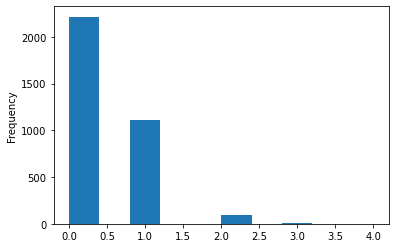

In [271]:
results_sorted = results_data.sort_values(['Label'], ascending=False)
# results_sorted['Count'].head(10).plot(kind='barh')
results_sorted['Count'].plot(kind='hist')
plt.show()

In [272]:
results_data.describe()


,Count
count,3431.000
mean,0.389
std,0.563
min,0.000
25%,0.000
50%,0.000
75%,1.000
max,4.000


In [273]:
results_data['Count'].mean()

0.38939084814922764

In [274]:
# Skips rows and handles no header
# movies_skip_rows = pd.read_excel("movies-no-header-skip-rows.xls", header=None, skiprows=4)
# movies_skip_rows.head(5)

In [275]:
# dropping null value columns to avoid errors
results_data.dropna(inplace = True)

In [276]:
# results_data.append(results_data['Label'].str.split(":", expand=True))
split_label = results_data['Label'].str.split(":", expand=True)
split_label.columns = ['id', 'ordinal']
split_label['id'] = split_label['id'].str.replace('C1-20200629_CellROX Tgfb2 TNFa.lif - ','').str.replace('.tif','')
split_label.head()

,id,ordinal
0,Positive con_1,0
1,Positive con_1,1
2,Positive con_1,2
3,Positive con_1,3
4,Positive con_1,4


In [277]:
results_data['id'] = split_label['id']
results_data['ordinal'] = split_label['ordinal']
results_data.head()

,Label,Count,id,ordinal
0,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,1,Positive con_1,0
1,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,0,Positive con_1,1
2,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,1,Positive con_1,2
3,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,0,Positive con_1,3
4,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...,0,Positive con_1,4


In [278]:
new_column_order = ['id', 'ordinal', 'Count', 'Label']
results_data = results_data[new_column_order]
results_data.rename(columns={'Count': 'nuclei_count', 'Label': 'description'}, inplace=True)
results_data.head()

,id,ordinal,nuclei_count,description
0,Positive con_1,0,1,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...
1,Positive con_1,1,0,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...
2,Positive con_1,2,1,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...
3,Positive con_1,3,0,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...
4,Positive con_1,4,0,C1-20200629_CellROX Tgfb2 TNFa.lif - Positive ...


In [279]:
results_data.groupby('id')['nuclei_count'].sum()

id
Con_1             69
Con_2             86
Con_3             60
Con_4             71
Con_5             47
Con_6             63
Positive con_1    54
Positive con_2    63
Positive con_3    54
Positive con_4    56
Positive con_5    70
Positive con_6    54
TGFb2_1           40
TGFb2_2           34
TGFb2_3           53
TGFb2_4           49
TGFb2_5           45
TGFb2_6           36
TNFa_1            52
TNFa_2            57
TNFa_3            54
TNFa_4            63
TNFa_5            64
TNFa_6            42
Name: nuclei_count, dtype: int64

In [280]:
results_value_counts = results_data.groupby('id')['nuclei_count'].value_counts(sort=False).to_frame(name='count_frequency')
results_value_counts
# results_value_counts_list = results_data.groupby('id')['nuclei_count'].value_counts(sort=False).index.tolist()
# results_value_counts_list

count_frequency
id     nuclei_count                 
Con_1  0                          70
       1                          63
       2                           3
Con_2  0                          61
       1                          64
...                              ...
TNFa_5 2                           4
TNFa_6 0                         108
       1                          35
       2                           2
       3                           1

[82 rows x 1 columns]

In [281]:
results_value_counts_normalized = results_data.groupby('id')['nuclei_count'].value_counts(sort=False, normalize=True).to_frame()
results_value_counts_normalized

nuclei_count
id     nuclei_count              
Con_1  0                    0.515
       1                    0.463
       2                    0.022
Con_2  0                    0.452
       1                    0.474
...                           ...
TNFa_5 2                    0.024
TNFa_6 0                    0.740
       1                    0.240
       2                    0.014
       3                    0.007

[82 rows x 1 columns]

In [282]:
from openpyxl import load_workbook

book = load_workbook(excel_file_path)
excel_writer = pd.ExcelWriter(excel_file_path, engine='openpyxl')
excel_writer.book = book

results_data.to_excel(excel_writer, sheet_name= 'Data_Results')
results_value_counts.to_excel(excel_writer, sheet_name= 'Results_Value_Counts')
excel_writer.save()
excel_writer.close()


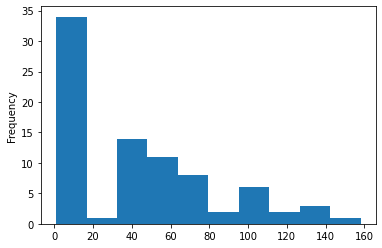

In [283]:
# results_sorted['Count'].head(10).plot(kind='barh')
results_value_counts['count_frequency'].plot(kind='hist')
plt.show()

In [284]:
results_value_counts['count_frequency']

id      nuclei_count
Con_1   0                70
        1                63
        2                 3
Con_2   0                61
        1                64
                       ... 
TNFa_5  2                 4
TNFa_6  0               108
        1                35
        2                 2
        3                 1
Name: count_frequency, Length: 82, dtype: int64

In [285]:
results_value_counts.columns[0]


'count_frequency'